이곳에서는 차원축소에 대해서 공부한 것을 적을 것입니다. 처음 공부하는 파트여서 자세히 적겠습니다.

------

# 차원축소


차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것이다. 일반적으로 차원이 증가하면 데이터 간의 거리가 기하급수적으로 멀어지고, 희소한 구조를 가지게 된다. 또한 피처가 많아지면 피처들끼리 상관관계가 형성되서 다중 공선성 문제가 발생할 확률이 높아진다. 그렇게 되면 모델의 예측성능이 저하된다.



이렇게 많은 다차원의 피처를 차원 축소해 피처수를 줄이면 더 직관적으로 데이터를 이해할 수 있다. 또한 삼차원 이하로 차원축소를 할 경우 데이터를 시각적으로 확인할 수 있는 장점이 있다.

---

일반적으로 차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)로 나눌 수 있다.
- 피처선택은 말 그대로 특정피처에 종속성이 강한 피처를 아예 삭제하고, 데이터의 특징을 잘 나타내는 주요피처만 선택하는 것이다.
- 피처추출은 기존 피처를 저차원의 중요피처로 압축해서 추출하는 것이다. 이렇게 새롭게 추출된 중요 피처는 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 된다.

피처추출은 기존 피처를 단순 압축이 아닌 피처를 함축적으로 더 잘 설명할 수 있는 또다른 공간으로 매핑해 추출하는 것이다. 

----
차원 축소는 단순히 데이터를 압축하는게 아니다. 더 중요한 의미는 차원축소를 통해 좀 더 제이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는데에 있다. 

차원축소는 이미지 데이터 분석과 텍스트 데이터 분석에서 유용하게 활용된다.

----

# PCA(Principal Component Analysis)

PCA는 데표적이 차원 축소 기법이다. <br>
PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법이다. <br>
그렇기 때문에 PCA로 차원 축소를 진행할 때 데이터 정보 유실이 가장 적다. <br>

이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아서 그 축으로 데이터를 투영해서 차원을 축소한다. 
#### 예시 이미지: 
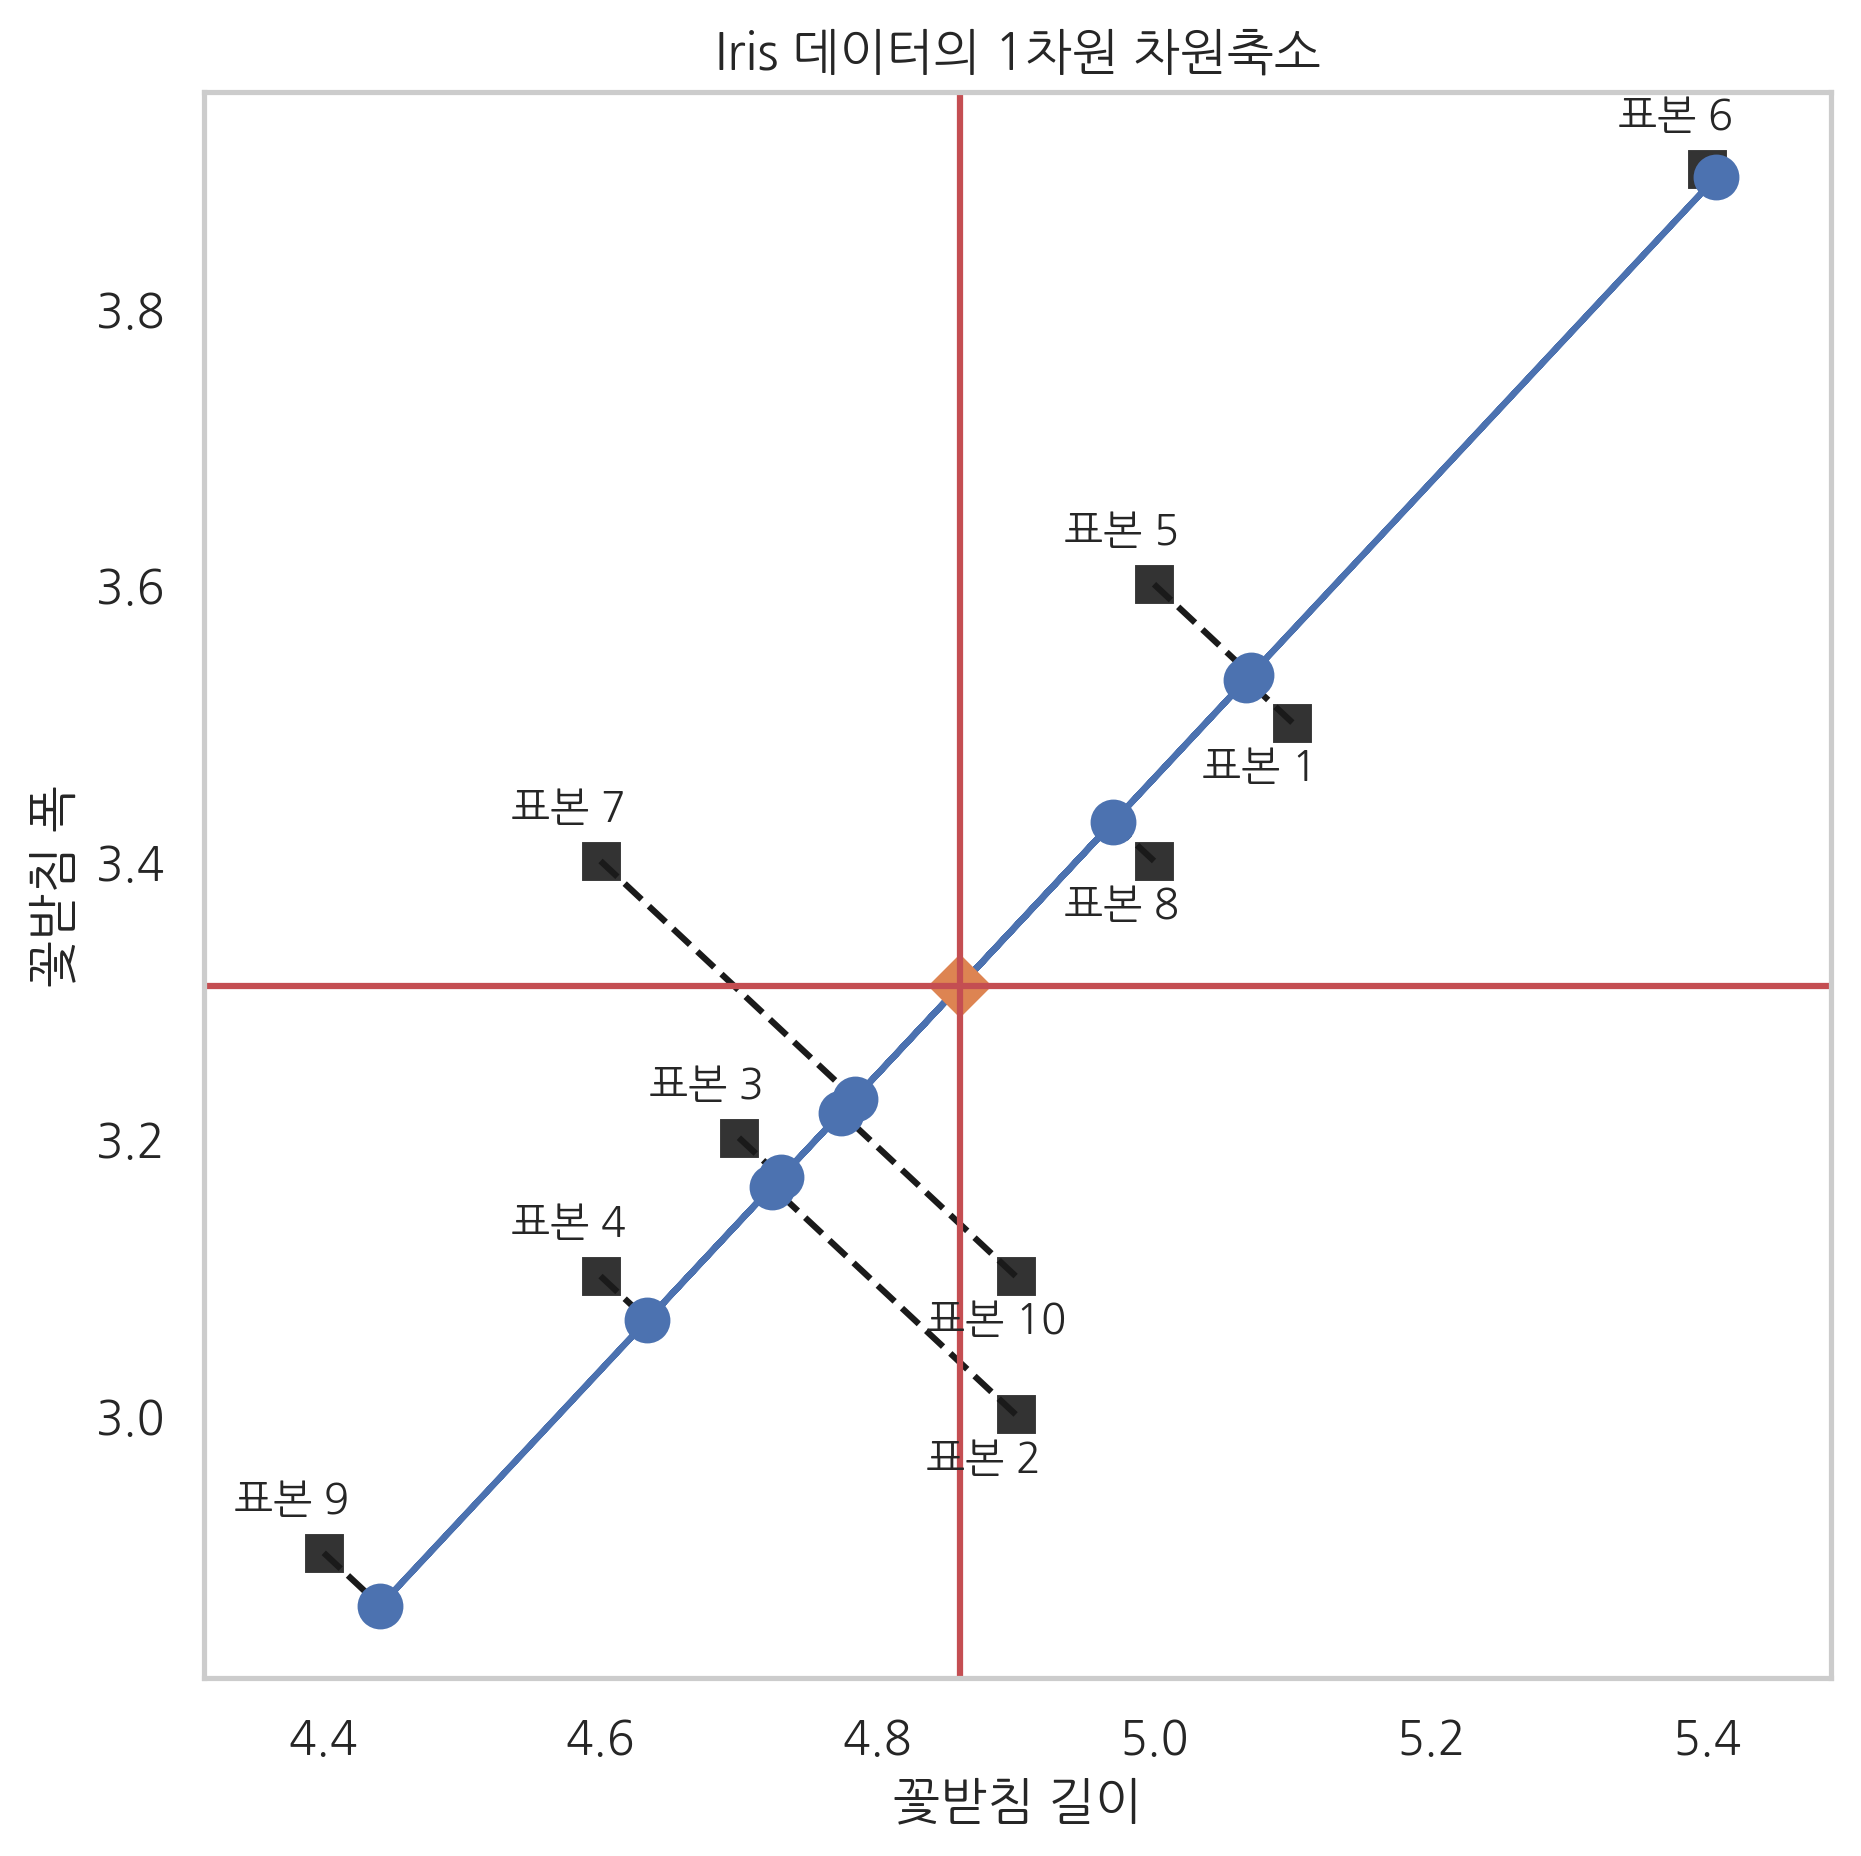


PCA는 1차원 뿐만 아니라 2차원, 3차원, n차원으로 축소가 가능한데, 이전에 생성된 축들에게서 직교된 방향으로 축이 생성된다.
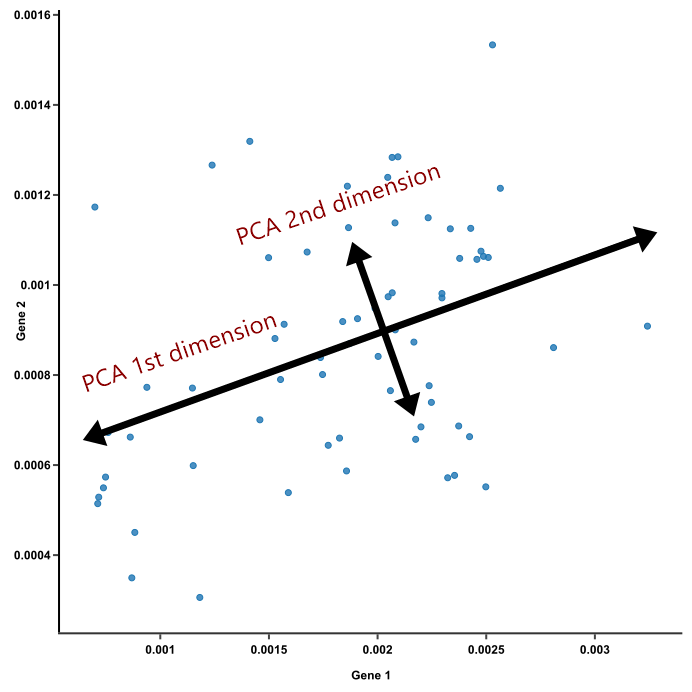

<b>PCA를 선형대수 관점에서 해석해 보면, 입력 데이터의 공분산 행렬을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다. 이 고유벡터가 PCA의 주성분벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다. 고윳값은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다. 이 의미를 좀 더 자세히 알아보기 위해서 선형 변환, 공분산 행렬과 고유벡터에 대해서 알아보자.<\b>
    
이게 뭔소리냐... 구글링하면서 봐봤는데.. 뭔소린지 모르겠다. 유튜브에서 강의 찾고 이부분은 다시 이해해보자!

# iris 데이터를 이용한 PCA실습

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(iris.data , columns = columns)
df['target'] = iris.target
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


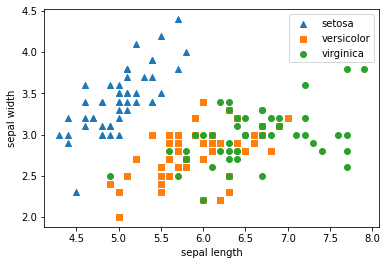

In [6]:
# 각 데이터의 sepal_length와 sepal_width 데이터분포를 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['sepal_length']
    y_axis_data = df[df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [7]:
# target 컬럼의 제외한 데이터를 정규화(standard scaling)하기
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(df.iloc[:, :-1])

In [11]:
# PCA 변환하기
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

iris_pca = pca.fit_transform(iris_scaled)

df_pca = pd.DataFrame(iris_pca, columns=['pca_component_1', 'pca_component_2'])
df_pca['target'] = iris.target

df_pca

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


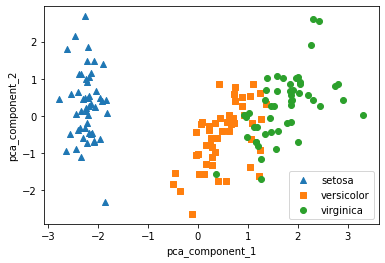

In [14]:
# 각 데이터의 pca_component_1과 pca_component_2 데이터분포를 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df_pca[df_pca['target']==i]['pca_component_1']
    y_axis_data = df_pca[df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [16]:
# 컴포넌트별로 차지하는 변동성 비율
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [18]:
# 원본데이터 학습 모델 예측성능
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)

print("원본 데이터 평균 정확도: ", np.mean(scores))

원본 데이터 평균 정확도:  0.96


In [19]:
# PCA 적용 데이터 학습 모델 예측 성능
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, df_pca[['pca_component_1', 'pca_component_2']], df_pca['target'], scoring='accuracy', cv=3)

print("원본 데이터 평균 정확도: ", np.mean(scores))

원본 데이터 평균 정확도:  0.88


# 신용카드 고객 데이터 세트를 이용한 PCA 실습

In [21]:
import pandas as pd

df = pd.read_excel("pca_credit_card.xls", header=1, sheet_name='Data').iloc[0:,1:]
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [22]:
df.rename(columns={'Pay_0':'Pay_1', 'default payment next month':'default'}, inplace=True)
y = df['default']
X = df.drop('default', axis=1)

<AxesSubplot:>

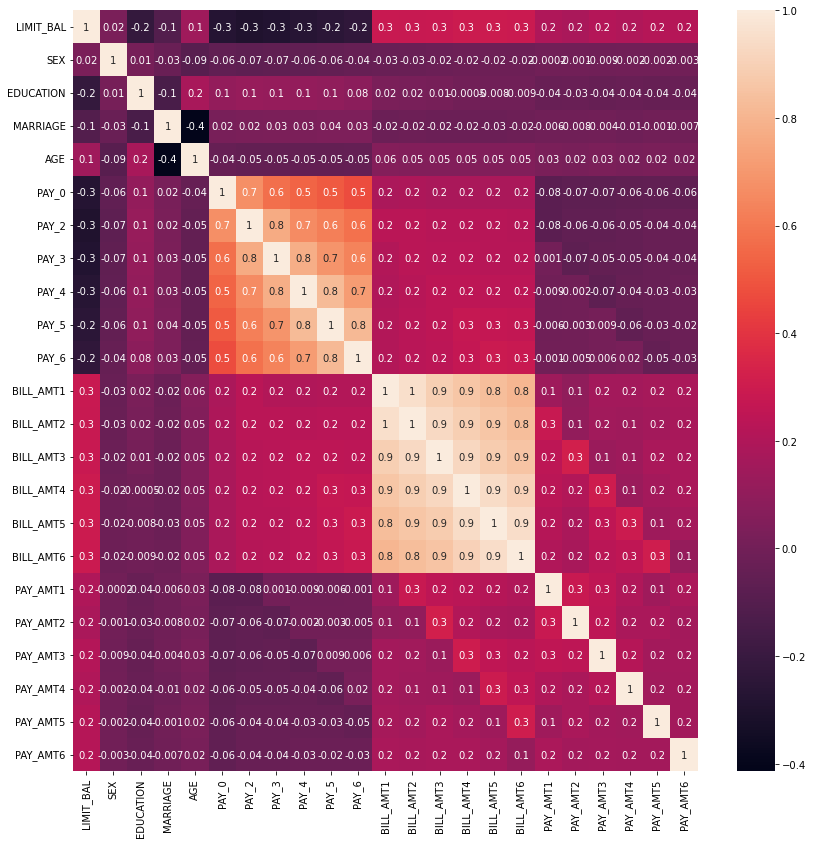

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X[cols_bill])

pca = PCA(n_components=2)
pca.fit(df_scaled)
print('PCA component 변동성: ', pca.explained_variance_ratio_)

PCA component 변동성:  [0.90555253 0.0509867 ]


In [32]:
rf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rf, X, y, scoring='accuracy', cv=3)

print("원본 데이터 학습 모델 예측 성능: ", np.mean(scores))

원본 데이터 학습 모델 예측 성능:  0.8170333333333333


In [34]:
rf = RandomForestClassifier(n_estimators=300, random_state=156)

scaler= StandardScaler()
df_scaled = scaler.fit_transform(X)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores = cross_val_score(rf, df_pca, y, scoring='accuracy', cv=3)

print("원본 데이터 학습 모델 예측 성능: ", np.mean(scores))

원본 데이터 학습 모델 예측 성능:  0.7965


# LDA (Linear Discriminant Analysis)

LDA 는 PCA와 유사하게 차원을 축소하지만, 데이터의 변동성이 가장큰 축을 찾는 PCA와 달리 LDA는 입력데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.

LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해서 클래스 간 분산과 클래스 내부분산의 비율을 최대화 하는 방식으로 차원을 축소한다. 클래스 내부 분산은 낮게, 클래스간 분산은 높게 하는것이 좋은 분리이다.

# 붓꽃 데이터를 이용한 LDA 실습

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)


df_lda = pd.DataFrame(iris_lda, columns=['lda1', 'lda2'])
df_lda['target'] = iris.target
df_lda

,lda1,lda2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0
...,...,...,...
145,-5.645003,1.677717,2
146,-5.179565,-0.363475,2
147,-4.967741,0.821141,2
148,-5.886145,2.345091,2


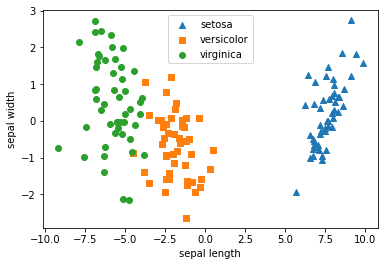

In [50]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df_lda[df_lda['target']==i]['lda1']
    y_axis_data = df_lda[df_lda['target']==i]['lda2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# SVD (Singular Value Decomposition)

# NMF (Non-Negative Matrix Factorization)

#### 위 두개는 선형대수학 지식의 부족으로 인해서 뭔말인지 모르겄다... 선형대수 공부하고 다시 공부해보자